# Importing and First Check

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

In [2]:
#Create dataframe from CSV

house_data = pd.read_csv('regression_data_clean.csv')

In [3]:
#Checking data types

house_data.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [4]:
#First Overview

house_data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


# Cleaning

In [5]:
# Checking for Nulls


nulls = pd.DataFrame(house_data.isna().sum()/len(house_data))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,id,0.0
11,sqft_above,0.0
19,sqft_lot15,0.0
18,sqft_living15,0.0
17,long,0.0
16,lat,0.0
15,zipcode,0.0
14,yr_renovated,0.0
13,yr_built,0.0
12,sqft_basement,0.0


In [6]:
# Checking for duplicates 

house_dupes = house_data[house_data['id'].duplicated() == True]
house_dupes

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
94,6021501535,12/23/14,3,1.50,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
314,4139480200,12/9/14,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
325,7520000520,3/11/15,2,1.00,1240,12092,1.0,0,0,3,...,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,240500
346,3969300030,12/29/14,4,1.00,1000,7134,1.0,0,0,3,...,1000,0,1943,0,98178,47.4897,-122.240,1020,7138,239900
372,2231500030,3/24/15,4,2.25,2180,10754,1.0,0,0,5,...,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929,530000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/15,4,3.50,2910,5260,2.0,0,0,3,...,2910,0,2012,0,98065,47.5168,-121.883,2910,5260,645000
20597,2724049222,12/1/14,2,2.50,1000,1092,2.0,0,0,3,...,990,10,2004,0,98118,47.5419,-122.271,1330,1466,220000
20654,8564860270,3/30/15,4,2.50,2680,5539,2.0,0,0,3,...,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,502000
20764,6300000226,5/4/15,4,1.00,1200,2171,1.5,0,0,3,...,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,380000


In [7]:
# Since there are 177 duplicte id, I will convert the date to datetime and keep the newer version

#convert date to datetime

house_data['date'] = pd.to_datetime(house_data['date'])

In [8]:
# Sort by date and drop older date
house_data = house_data.sort_values(by=['id', 'date'])
house_data = house_data.drop_duplicates(['id'], keep='last')

In [9]:
# Check if row count changed

house_data

"""success"""

'success'

In [10]:
# Get list of column names

house_data.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [11]:
# Check amount of unique values in different columns

house_data.nunique()

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3595
dtype: int64

# Splitting up the Data for analysis

In [12]:
# Splitting off the numeric columns to plot

house_numeric = house_data.drop(['zipcode','date','id','lat', 'long'], axis=1)

In [13]:
# Splitting off the continuous numeric columns to plot

house_num_cont = house_numeric[['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement', 'yr_renovated']]

In [14]:
# Splitting off the discrete numeric columns to plot

house_num_disc = house_numeric[['bedrooms', 'bathrooms','floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built']]

In [15]:
# Splitting off the categorical columns to plot

house_catagoric = house_data[['zipcode']]

# Initial plotting of all data for overview

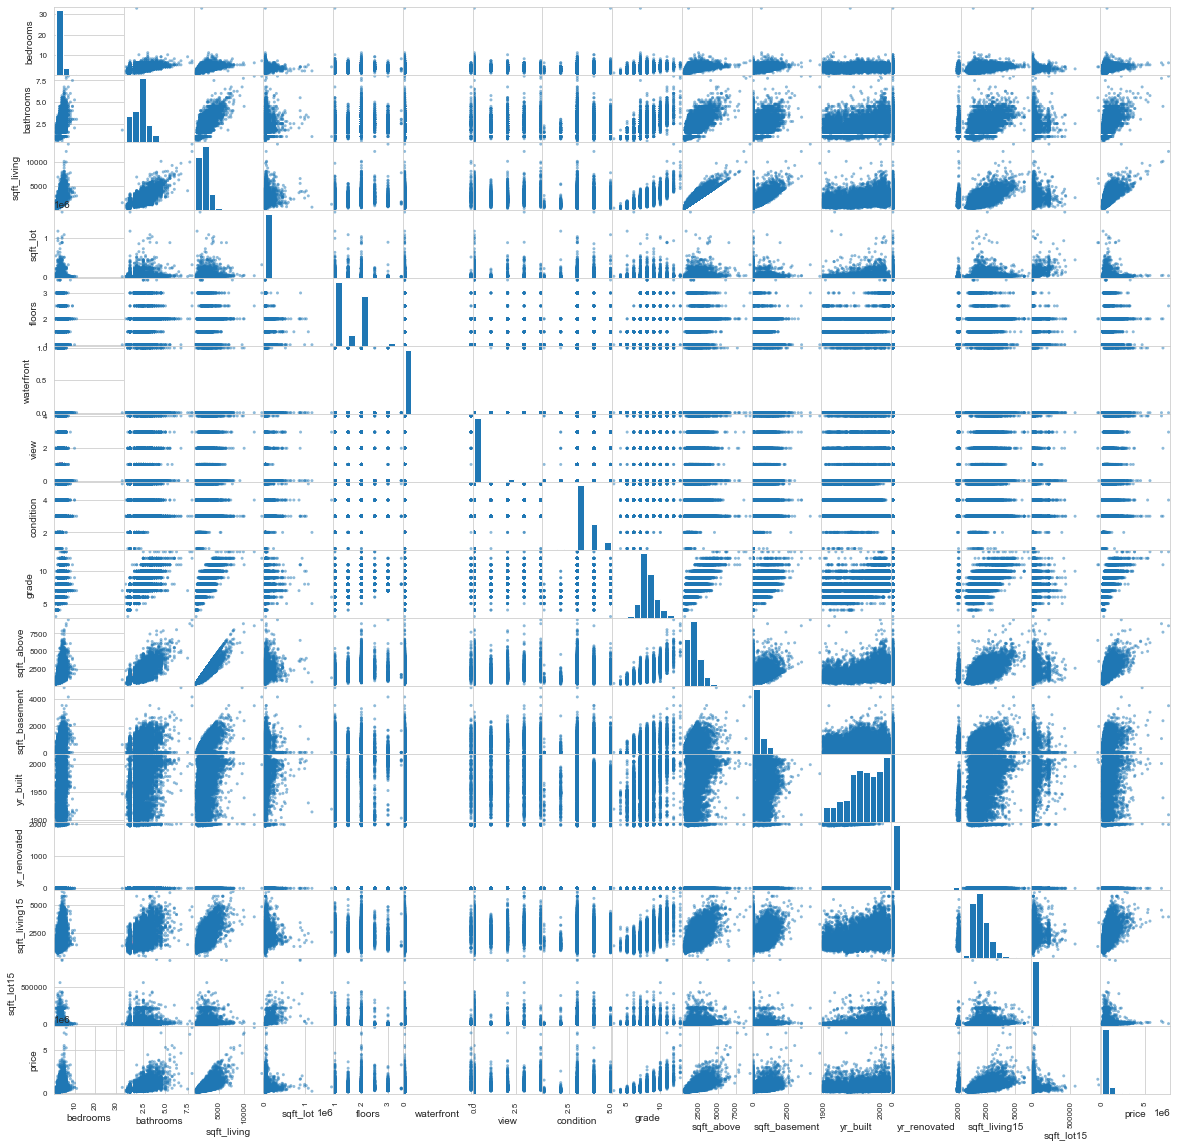

In [16]:
# Initial plotting of all data for overview

import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(house_numeric, figsize=(20,20))
plt.show()

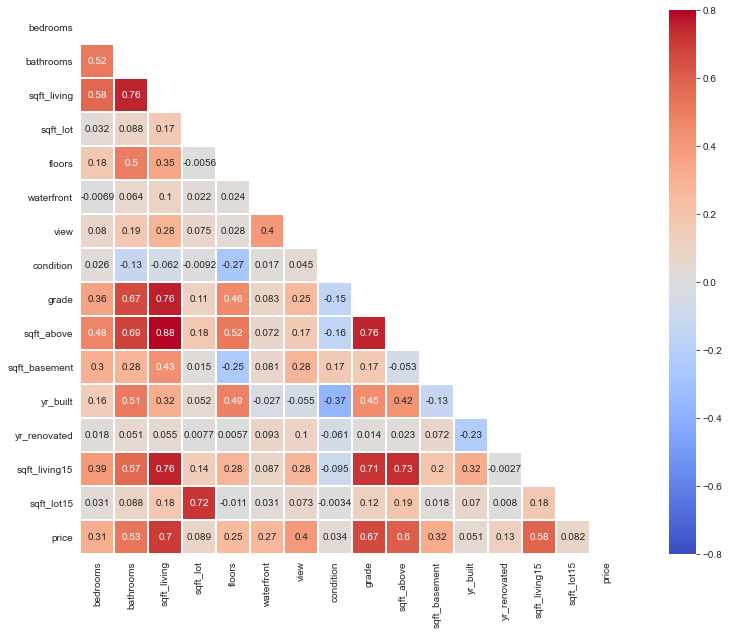

In [17]:
# Plotting a correlation matrix

mask = np.zeros_like(house_numeric.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(house_numeric.corr(), mask=mask, annot=True,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)
            

  
Observations:

high correlation to price: bathrooms, sqft_living, view, grade, sqft_above, sqft_living15

high correlation to each other: sqft_living vs sqft_living15, sqft_living vs sqft_above, sqft_living vs grade, sqft_lot vs sqft_lot15
  

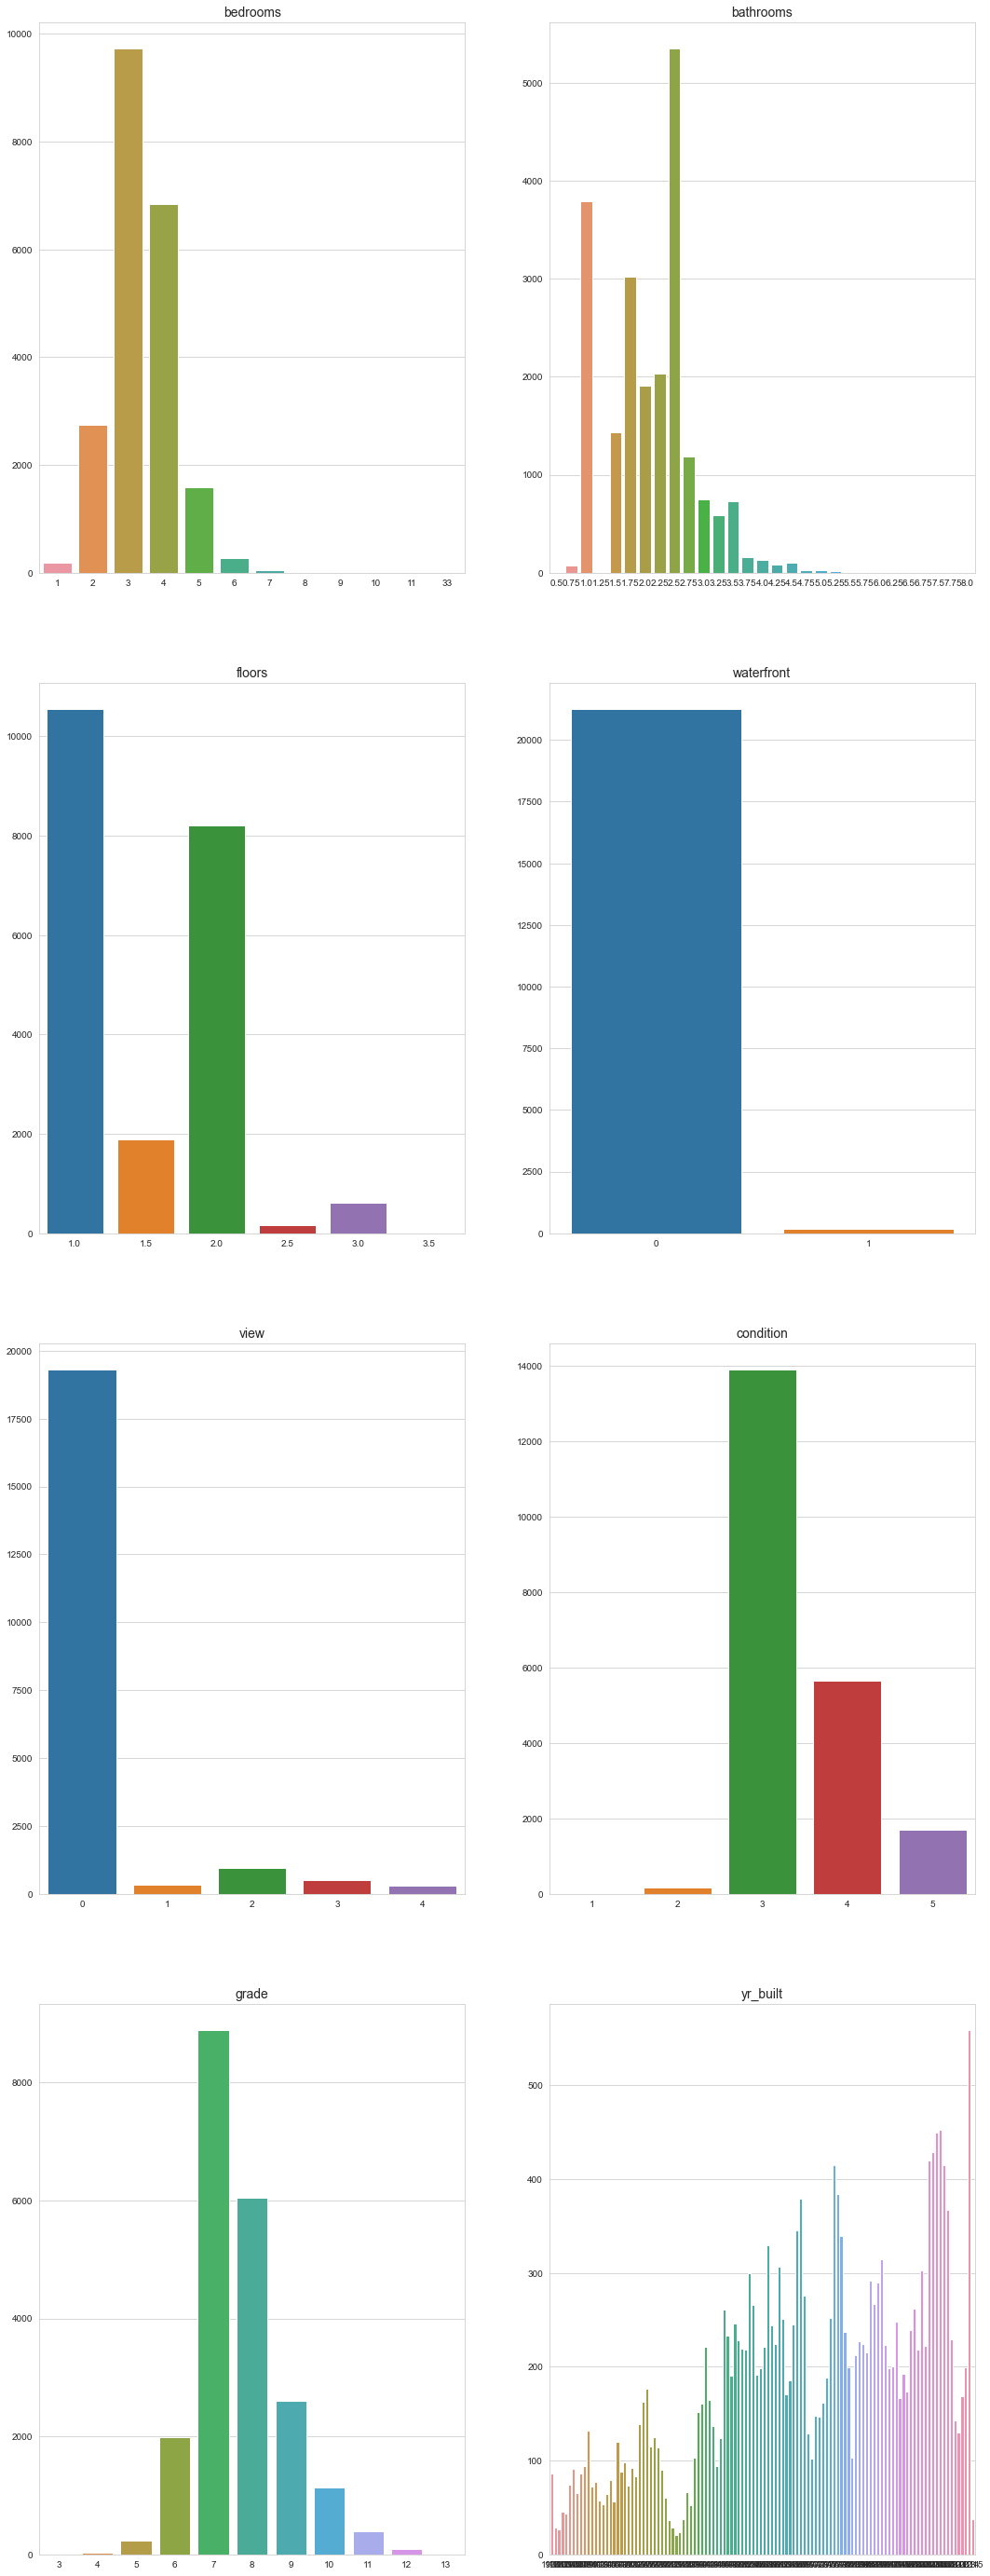

In [18]:
# Bar Plot of discrete features

f, axes = plt.subplots(int(house_num_disc.shape[1] / 2), 2, figsize=(18, 50))

for i, col in enumerate(house_num_disc):

    sns.barplot(x = house_num_disc[col].value_counts().index,
                y = house_num_disc[col].value_counts(),
                ax=axes[int(i / 2)][int(i) % 2])  
    axes[int(i / 2)][int(i) % 2].set_title(col, fontsize = 14)
    axes[int(i / 2)][int(i) % 2].set_ylabel("")

plt.show();



Observations:

-bedrooms has extreme outliers

-bathrooms has outliers

-view could be binary

-could bin yr_built

# Sense Check for useful columns

In [19]:
# Sense Check for useful columns

house_data.columns



Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

POTENTIAL DROPS:

id - unique id now, no relevance to regression model
lat & long
sqft_living & sqft_lot - relying on the most current values for model
zipcode

Potential Conversions:

yr_renovated - has mostly 0s, could be converted into binary 1/0 based on if renovated at all (like waterfront)
sqft_basement - has mostly 0s, could be converted into binary 1/0 based on if it has a basement at all (like waterfront)
view - has mostly 0s, could be converted into binary 1/0 based on if it has a view at all (like waterfront)
yr_built - bin into 3 

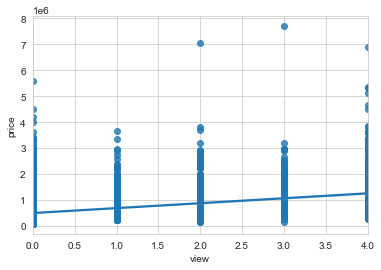

In [20]:
# plot view against price

sns.regplot(x=house_data['view'], y=house_data['price']) 

# change columns to binary for sqft_basement, yr_renovated

In [21]:
# change columns to binary for sqft_basement, yr_renovated

def go_binary(x):
    if x == 0:  
        return 0
    else:
        return 1

In [22]:
#create new data frame with changes

house_clean = house_data.copy(deep=True)

In [23]:
house_clean['sqft_basement'] = house_clean['sqft_basement'].apply(go_binary)  

In [24]:
house_clean['sqft_basement'].value_counts()

0    12999
1     8421
Name: sqft_basement, dtype: int64

In [25]:
house_clean['yr_renovated'] = house_clean['yr_renovated'].apply(go_binary)  

In [26]:
house_clean['yr_renovated'].value_counts()

0    20510
1      910
Name: yr_renovated, dtype: int64

# dropping unwanted features 

In [27]:
# dropping unwanted features based on first analysis


house_clean = house_clean.drop(['id','date','sqft_living', 'sqft_lot','yr_built','zipcode', 'lat', 'long'], axis=1)



Reasons for dropping:

'id'- not needed for model

'date'- not needed for model

'sqft_living', 'sqft_lot' - using 2015 data

'yr_built'- no strongly visible correleations

'zipcode'- not needed for model

'lat', 'long' - not needed for model

In [28]:
house_clean

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,price
2495,6,3.00,2.0,0,0,3,7,2400,0,0,2060,7316,300000
6729,4,1.75,1.0,0,0,4,8,1160,1,0,2590,21891,647500
8404,3,1.00,1.0,0,0,3,7,1460,0,0,2250,20023,400000
8800,3,1.00,1.5,0,0,4,6,1010,1,0,1290,10320,235000
3553,4,2.00,1.0,0,0,3,7,760,1,1,1480,3504,402500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16723,5,2.00,1.5,0,0,3,7,1600,0,0,1190,4168,365000
3257,2,1.00,1.0,0,0,5,7,840,1,0,1930,5150,380000
7614,3,1.00,1.0,0,0,4,7,720,1,0,1510,4538,339000
20963,2,1.75,1.5,0,0,3,9,900,1,0,1440,1188,399900


# First run at modelling with cleaned data

In [29]:
# First run at modelling with cleaned data

y = house_clean['price']
X = house_clean.drop(['price'], axis=1)

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn import linear_model


In [30]:
cor_X = MinMaxScaler().fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(cor_X, y, test_size=0.4)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(12852, 12) (12852,)
(8568, 12) (8568,)


In [32]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

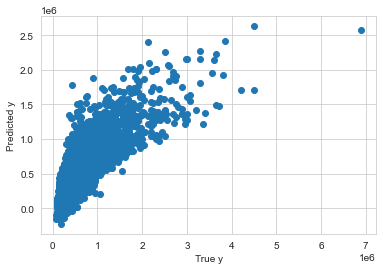

In [33]:
plt.scatter(y_test, predictions)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.show()

In [34]:
print ('Score:', model.score(X_test, y_test))


Score: 0.6120268616996283


'\nFrom Previous attempt with all data in test notebook:\n-First run: Score: 0.6494360454513469 (all data)\n-Second run: Score: 0.5982473698296966 (only numeric data)\n\n1. Score: 0.6038192277715362 (test_size=0.2)\n2. Score: 0.604546687253582  (test_size=0.4)\n\n'

From Previous attempt with all data in test notebook:
    
-First run: Score: 0.6494360454513469 (all data)
        
-Second run: Score: 0.5982473698296966 (only numeric data)


This Round:

1. Score: 0.6038192277715362 (test_size=0.2)
    
2. Score: 0.604546687253582  (test_size=0.4)


# Looping back and dealing with outliers and skews



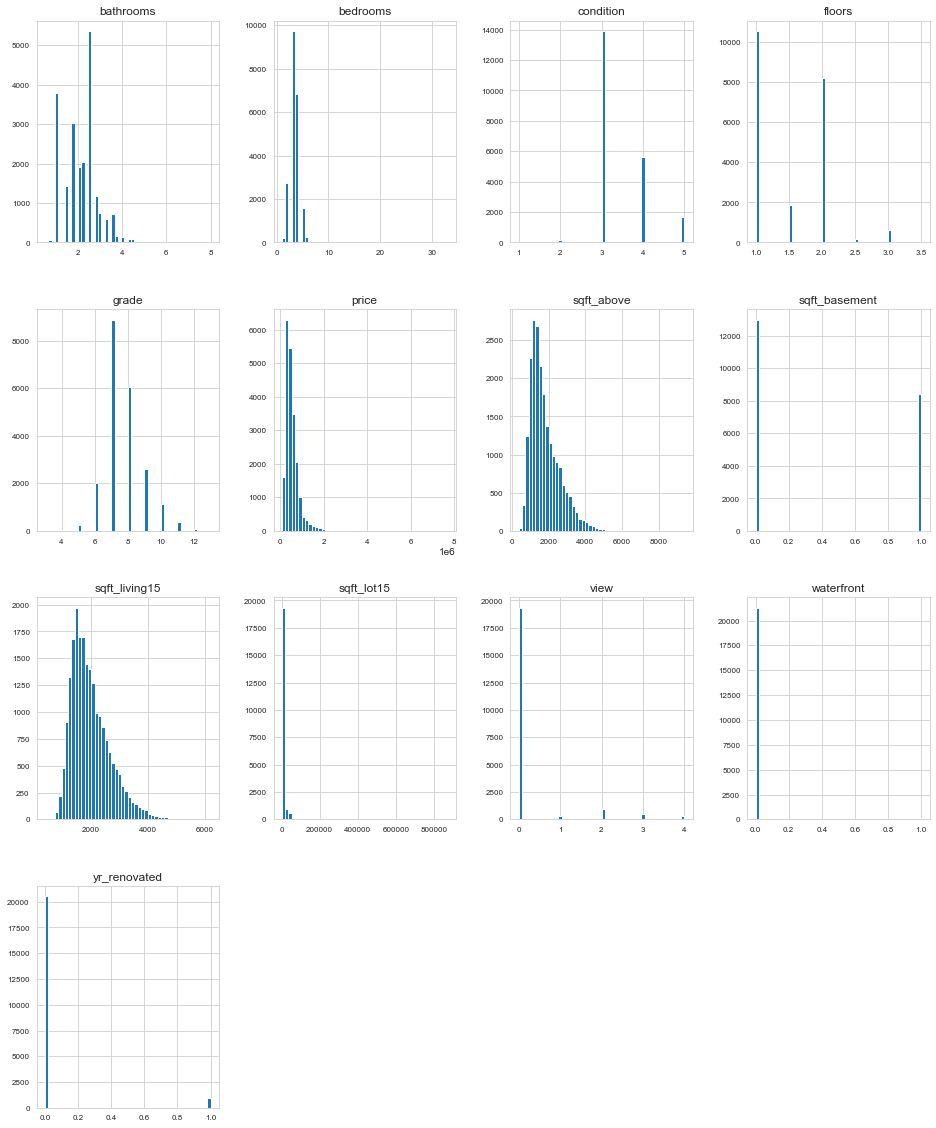

In [35]:
house_clean.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

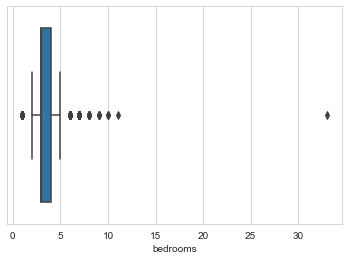

In [36]:
#Boxplots for outliers

#'bedrooms'

sns.boxplot(x=house_clean['bedrooms'])

In [37]:
house_clean['bedrooms'].unique()


# row with 33 bedrooms should be removed

array([ 6,  4,  3,  5,  2,  1,  7,  9, 10,  8, 11, 33], dtype=int64)

In [38]:
#Show row with 33 bedroom house

house_clean.loc[house_clean['bedrooms'] == 33]


,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15,price
15856,33,1.75,1.0,0,0,5,7,1040,1,0,1330,4700,640000


In [39]:
# Drop outlier row with 33 bedrooms

house_clean = house_clean.drop(axis=0, index=15856)

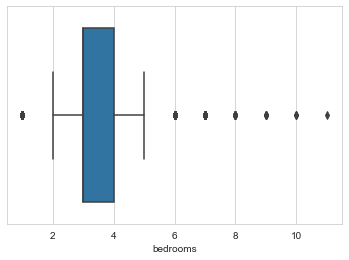

In [40]:
sns.boxplot(x=house_clean['bedrooms'])

[(-0.5, 10.0)]

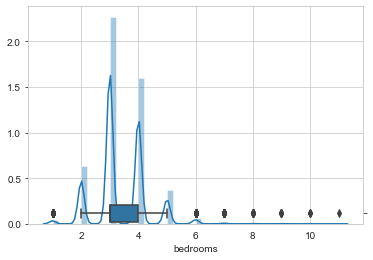

In [41]:
ax = sns.distplot(house_clean['bedrooms'])
ax2 = ax.twinx()
sns.boxplot(x=house_clean['bedrooms'], ax=ax2)
ax2.set(ylim=(-.5, 10))

In [42]:
#create data frame to test

house_test1 = house_clean.copy(deep=True)

In [43]:
#using standard scaler on dataframe

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(house_test1.iloc[:,:-1])
x_standardized = transformer.transform(house_test1.iloc[:,:-1])

In [44]:
house_test1_standardized = pd.DataFrame(x_standardized,columns=house_test1.columns.tolist()[:-1])
house_test1_standardized.head()
X = house_test1_standardized
y = house_test1['price'] 

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14993, 12) (14993,)
(6426, 12) (6426,)


In [46]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

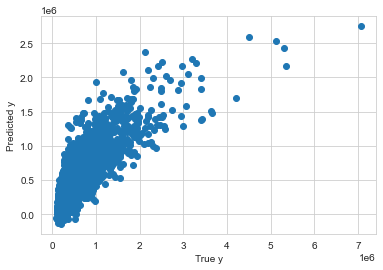

Score: 0.6111397574360552


In [47]:
plt.scatter(y_test, predictions)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.show()
print ('Score:', model.score(X_test, y_test))

#Score: 0.6111397574360552

Score after applying Standard Scaler:

Score: 0.6111397574360552

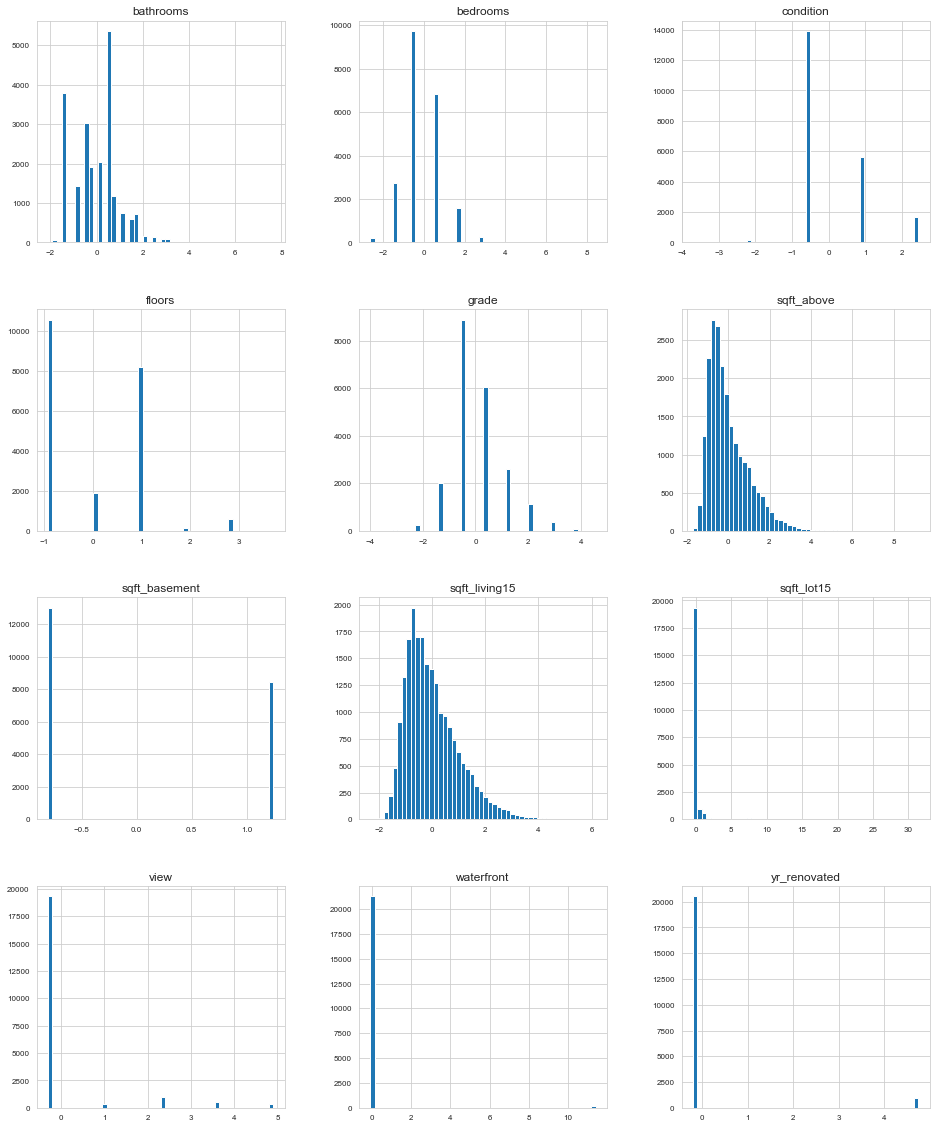

In [48]:
#Looking at data after scaling

house_test1_standardized.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [49]:
house_test1_standardized

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot15
0,2.909699,1.146788,0.933196,-0.08757,-0.306477,-0.631916,-0.565567,0.734659,-0.804824,-0.210644,0.104424,-0.199670
1,0.694839,-0.479301,-0.918414,-0.08757,-0.306477,0.906677,0.287703,-0.761702,1.242507,-0.210644,0.877557,0.333323
2,-0.412591,-1.454954,-0.918414,-0.08757,-0.306477,-0.631916,-0.565567,-0.399680,-0.804824,-0.210644,0.381585,0.265012
3,-0.412591,-1.454954,0.007391,-0.08757,-0.306477,0.906677,-1.418836,-0.942714,1.242507,-0.210644,-1.018807,-0.089817
4,0.694839,-0.154083,-0.918414,-0.08757,-0.306477,-0.631916,-0.565567,-1.244399,1.242507,4.747353,-0.741646,-0.339071
...,...,...,...,...,...,...,...,...,...,...,...,...
21414,1.802269,-0.154083,0.007391,-0.08757,-0.306477,-0.631916,-0.565567,-0.230736,-0.804824,-0.210644,-1.164681,-0.314789
21415,-1.520021,-1.454954,-0.918414,-0.08757,-0.306477,2.445270,-0.565567,-1.147860,1.242507,-0.210644,-0.085212,-0.278879
21416,-0.412591,-1.454954,-0.918414,-0.08757,-0.306477,0.906677,-0.565567,-1.292669,1.242507,-0.210644,-0.697884,-0.301259
21417,-1.520021,-0.479301,0.007391,-0.08757,-0.306477,-0.631916,1.140973,-1.075455,1.242507,-0.210644,-0.799996,-0.423765


# Rerun Model with less features

In [50]:
# Drop unhelpful columns

house_test1_standardized2 = house_test1_standardized.drop(['condition','floors','sqft_lot15','view'], axis=1)

In [51]:
#Rerun Model with less columns

X = house_test1_standardized2
y = house_test1['price'] 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(12851, 8) (12851,)
(8568, 8) (8568,)


In [53]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

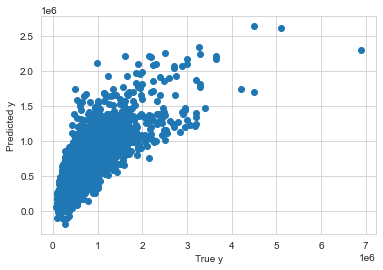

Score: 0.5794770543003305


In [54]:
plt.scatter(y_test, predictions)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.show()
print ('Score:', model.score(X_test, y_test))

#Score: 0.5859221207613478 got worse

Score after dropping columns: 0.5859221207613478   -got worse

Score after applying binary again: 0.5794770543003305    -got even worse

In [55]:
# Rebinarize columns to see if it changes



In [56]:
def re_binary(x):
    if x < 0:  
        return 0
    else:
        return 1

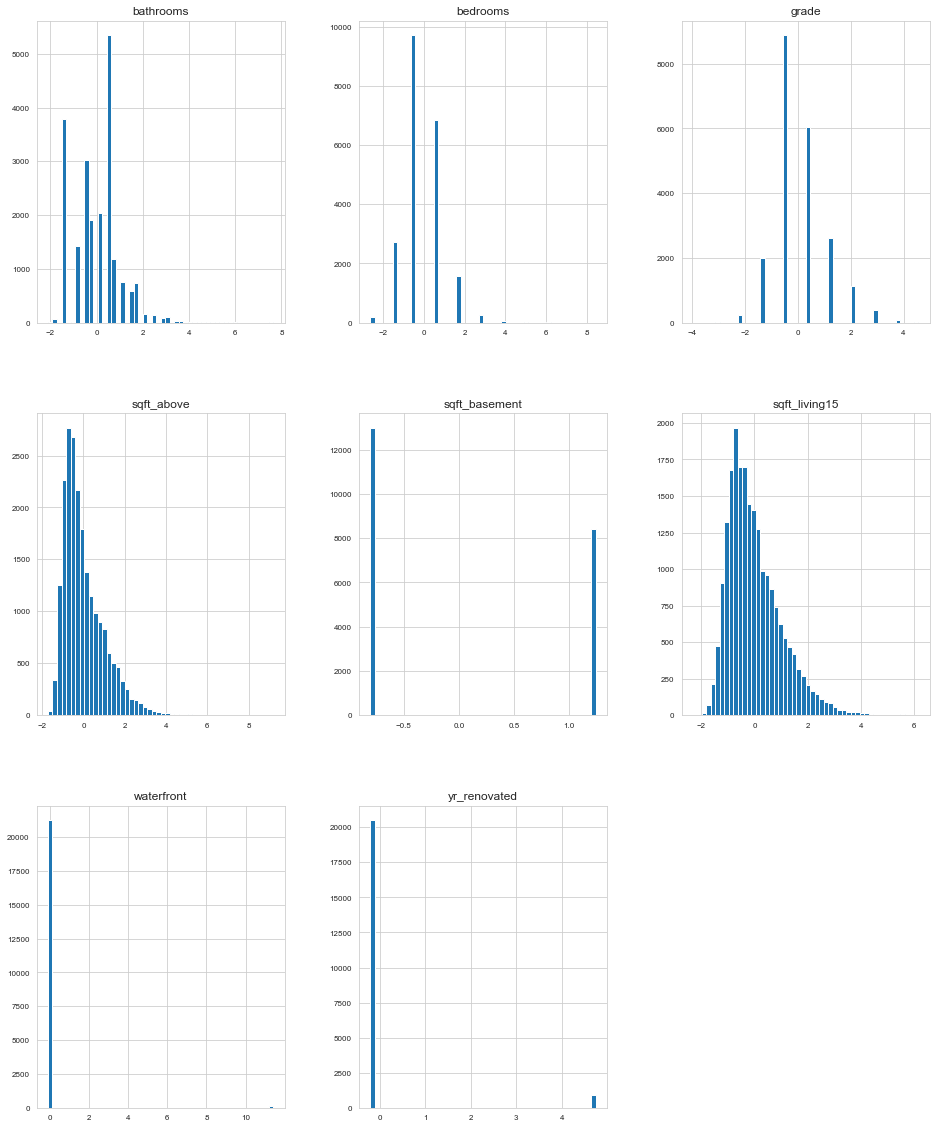

In [57]:
house_test1_standardized2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [58]:
house_test1_standardized2['yr_renovated'].value_counts()

-0.210644    20509
 4.747353      910
Name: yr_renovated, dtype: int64

In [59]:
house_test1_standardized2['sqft_basement'].value_counts()

-0.804824    12999
 1.242507     8420
Name: sqft_basement, dtype: int64

In [60]:
house_test1_standardized2['waterfront'].value_counts()

-0.087570     21256
 11.419497      163
Name: waterfront, dtype: int64

In [61]:
house_test1_standardized2['yr_renovated'] = house_test1_standardized2['yr_renovated'].apply(re_binary)  

In [62]:
house_test1_standardized2['sqft_basement'] = house_test1_standardized2['sqft_basement'].apply(re_binary)  

In [63]:
house_test1_standardized2['waterfront'] = house_test1_standardized2['waterfront'].apply(re_binary) 

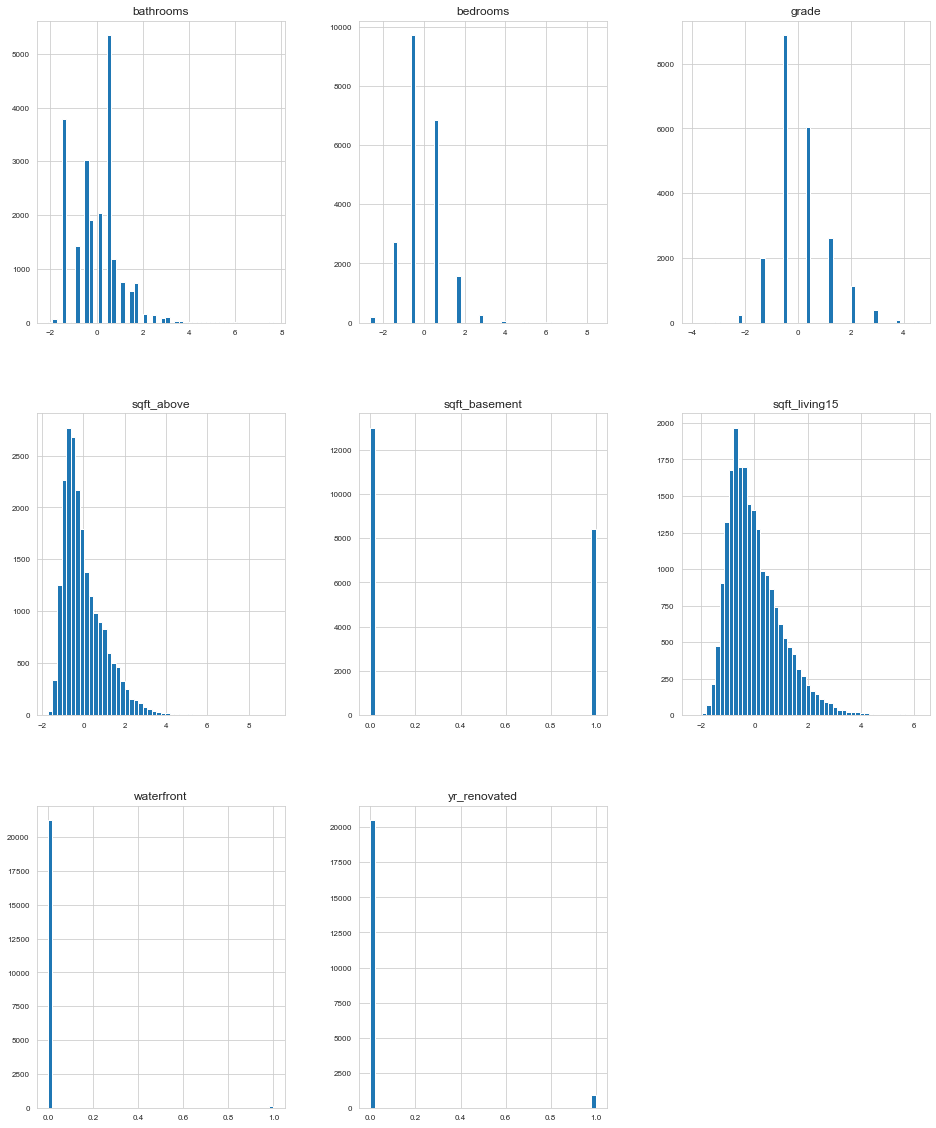

In [64]:
house_test1_standardized2.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

# Applying KNN Model

In [75]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 55, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=55)

In [76]:
y_pred = classifier.predict(X_test)


In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.00665266106442577

score 1 (nn 5) : 0.003968253968253968
score 2 (nn 15) : 0.004901960784313725

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f' the mean absolute value for our model is',mae)
print(f' the mean square value for our model is',mse)
print(f' the r2 score for our model is',r2)

 the mean absolute value for our model is 203655.91013071896
 the mean square value for our model is 99333789580.09221
 the r2 score for our model is 0.2720428808646893


Conclusion: The method I am using seems to be geared toward classification and isn't helping me for my model

# Applying Random Forrest

In [78]:
from sklearn.ensemble import RandomForestRegressor


In [79]:
rf = RandomForestRegressor()
model = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [80]:
print ('Score:', model.score(X_test, y_test)) 

Score: 0.6356059689432338


Score: 0.6356059689432338

In [81]:
model.feature_importances_

array([0.02922224, 0.08391054, 0.05265246, 0.46306252, 0.16695794,
       0.0343636 , 0.01994513, 0.14988558])

Conclusion: This method is returning better results than other models!